<a href="https://colab.research.google.com/github/renato-rodrig/prova_selecao/blob/main/Quest%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. Utilizando OpenCV, conte a quantidade de objetos na imagem abaixo (20 escores)

# Bibliotecas

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Pipeline

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def subtract_canny(image_gray):
    """
        Funcao responsavel por realçar uma imagem utilizando a operação de subtração com o filtro canny
        Arguments:
          image_gray: np.array -- Uma matriz NumPy que representa a imagem na escala de cinza
                com a forma (num_rows, num_cols, num_channels)
        Return:
          image_enhancement: np.array -- Imagem realçada
    """
    canny = cv2.Canny(image_gray, 100, 200)
    image_enhancement = cv2.subtract(image_gray, canny)
    return image_enhancement

In [4]:
def add_tophat(image_gray):
    """
        Funcao responsavel por realçar uma imagem utilizando a operação de adição com o filtro tophat
        Arguments:
          image_gray: np.array -- Uma matriz NumPy que representa a imagem na escala de cinza
                com a forma (num_rows, num_cols, num_channels)
        Return:
          image_processed: np.array -- Imagem realçada
    """
    structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    image_processed = cv2.morphologyEx(image_gray, cv2.MORPH_TOPHAT, structuring_element)
    image_processed = cv2.add(image_gray, image_processed)
    return image_processed

In [5]:
def contorno_opencv(image_):
  """
      Funcao responsavel por extrair todos os contornos
      Arguments:
        image_: np.array -- Uma matriz NumPy que representa a imagem pre-processada
      Return:
        contours:
        hierarchy:
  """
  contours, hierarchy = cv2.findContours(image_, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  print("Quantidade de contornos encontrados = " + str(len(contours)))

  return contours, hierarchy
  

In [6]:
def desenhando_contorno(image_orig, contours):
  """
      Funcao responsavel por extrair todos os contornos
      Arguments:
        image_orig: np.array -- Uma matriz NumPy que representa a imagem original
      Return:
   
  """
  image_copy = image_orig.copy()
  cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
  
  return image_copy

In [12]:
def main():
  im = cv2.imread('/content/questao1_provaMobit.png') # Lendo a imagem
  img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # Transformando para escala de cinza
  blur = cv2.medianBlur(img_gray, 5) # Aplicando mediana
  print(f'[INFO] Abordagem 1: \n  - Escala de Cinza + Mediana + Canny')
  im_canny = subtract_canny(blur) # Encontando bordas com Canny

  contours, hierarchy = contorno_opencv(im_canny) # Encontando os contornos

  image_desenhada = desenhando_contorno(im, contours) # Desenhando o contorno
  show_image(image_desenhada, title='Abordagem 1: Contornos', cmap_type='gray') # Exibindo a imagem

  print(f'\n\n[INFO] Abordagem 2: \n  - Escala de Cinza + Mediana + tophat')
  im_tophat = add_tophat(blur) # Aplicando tophat

  contours_tophat, hierarchy_tophat = contorno_opencv(im_tophat) # Encontando os contornos

  image_desenhada_tophat = desenhando_contorno(im, contours_tophat) # Desenhando o contorno
  show_image(image_desenhada_tophat, title='Abordagem 2: Contornos', cmap_type='gray') # Exibindo a imagem

  print(f'\n\n[INFO] Abordagem 3: \n  - Escala de Cinza + Mediana + Binarização')
  ret, thresh = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY) # binarizando

  contours_bin, hierarchy_bin = contorno_opencv(thresh) # Encontando os contornos

  image_desenhada_bin = desenhando_contorno(im, contours_bin) # Desenhando o contorno
  show_image(image_desenhada_bin, title='Abordagem 3: Contornos', cmap_type='gray') # Exibindo a imagem

  print(f'\n\n[INFO] Abordagem 4: \n  - Escala de Cinza + Mediana + topHat + Binarização')
  ret, thresh = cv2.threshold(im_tophat, 150, 255, cv2.THRESH_BINARY) # binarizando

  contours_bin, hierarchy_bin = contorno_opencv(thresh) # Encontando os contornos

  image_desenhada_bin = desenhando_contorno(im, contours_bin) # Desenhando o contorno
  show_image(image_desenhada_bin, title='Abordagem 4: Contornos', cmap_type='gray') # Exibindo a imagem



# Resultado

[INFO] Abordagem 1: 
  - Escala de Cinza + Mediana + Canny
Quantidade de contornos encontrados = 354


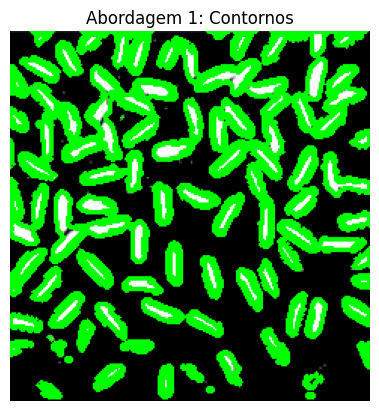



[INFO] Abordagem 2: 
  - Escala de Cinza + Mediana + tophat
Quantidade de contornos encontrados = 58


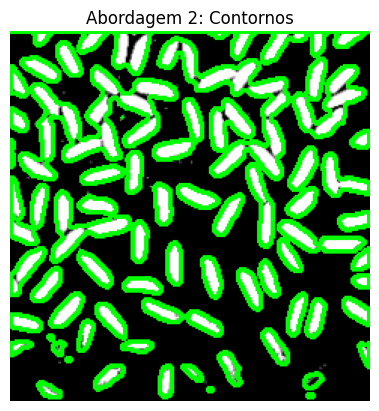



[INFO] Abordagem 3: 
  - Escala de Cinza + Mediana + Binarização
Quantidade de contornos encontrados = 87


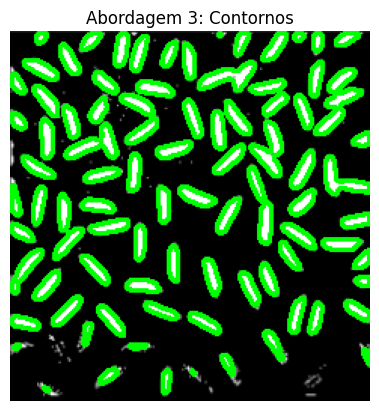



[INFO] Abordagem 4: 
  - Escala de Cinza + Mediana + topHat + Binarização
Quantidade de contornos encontrados = 91


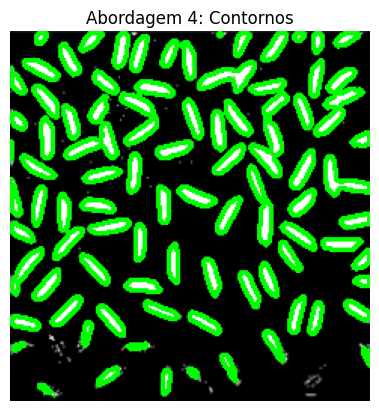

In [13]:
if __name__ == "__main__":
  main()